<a href="https://colab.research.google.com/github/Aafreen2603/deep-learning/blob/main/Multilayer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Deep Multi Layer Neural Network to classify self generated random data.


In [ ]:
# import Libraries

import torch

import torch.nn as nn

import numpy as np

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
#parameters
nPerClust = 100

blur = 1
A=[ 1,1]
B=[ 5,1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]

In [ ]:
# true Labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

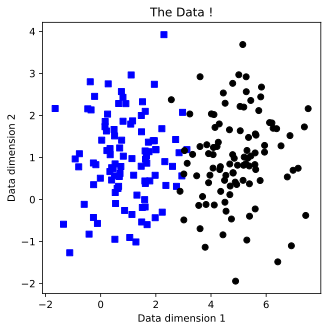

In [ ]:
# show the data

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1], 'ko')
plt.title('The Data !')

plt.xlabel('Data dimension 1')

plt.ylabel("Data dimension 2")

plt.show()

In [ ]:
def createANNmodel(learningRate) :

   # model architecture
   
   ANNclassify = nn.Sequential(
   
   nn.Linear(2,16),
   nn.ReLU(),
   nn.Linear(16,1),
   nn.ReLU(),
   nn.Linear(1,1),
   nn.Sigmoid(),
   
   )
   
   # Loss function
   
   # input Layer
   
   # activation unit
   
   # hidden Layer
   
   # activation unit
   
   # output unit
   
   # final activation unit
   
   lossfun = nn.BCELoss() # but better to use BCEWithLogitsLoss
   
   # optimizer
   
   optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
   
   # model output
   
   return ANNclassify, lossfun,optimizer

In [ ]:
# a fixed parameter
numepochs = 1000

def trainTheModel (ANNmodel):
  # initialize Losses
  
  losses = torch.zeros(numepochs)
  # Loop over epochs
  for epochi in range(numepochs):
  
     # forward pass
        yHat = ANNmodel(data)
     
     # compute Loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss
     
     # backprop
     
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
     
     # final forward pass
  predictions = ANNmodel(data)
     
     # compute the predictions and report accuracy
     # NOTE: Wasn't this ">@" previousLy?!?!
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())
  
  return losses, predictions, totalacc

Final accuracy: 98%


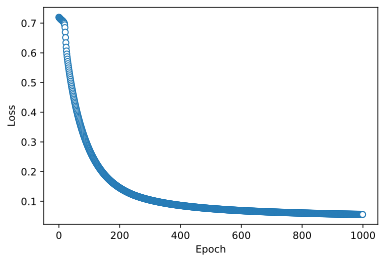

In [ ]:
# create everything
ANNclassify, lossfun,optimizer = createANNmodel( .1)

# run it
losses, predictions,totalacc = trainTheModel (ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the Losses

plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()


In [ ]:
# Learning rates
learningrates = np.linspace(.001, .1,50)

# inittaLize
accByLR = []
allLosses = np.zeros((len(learningrates ) ,numepochs) )

# the Loop
for i,lr in enumerate(learningrates):

# create and run the model

    ANNclassify, lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

# store the results
    accByLR.append(totalacc)
    allLosses[i,:] = losses.detach()

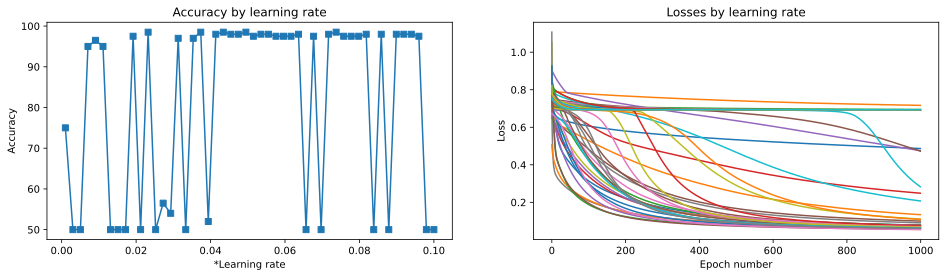

In [ ]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('*Learning rate')
ax[0].set_ylabel( 'Accuracy' )
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)

ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()


In [ ]:
accByLR

[tensor(75.),
 tensor(50.),
 tensor(50.),
 tensor(95.),
 tensor(96.5000),
 tensor(95.),
 tensor(50.),
 tensor(50.),
 tensor(50.),
 tensor(97.5000),
 tensor(50.),
 tensor(98.5000),
 tensor(50.),
 tensor(56.5000),
 tensor(54.0000),
 tensor(97.),
 tensor(50.),
 tensor(97.),
 tensor(98.5000),
 tensor(52.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(97.5000),
 tensor(98.),
 tensor(98.),
 tensor(97.5000),
 tensor(97.5000),
 tensor(97.5000),
 tensor(98.),
 tensor(50.),
 tensor(97.5000),
 tensor(50.),
 tensor(98.),
 tensor(98.5000),
 tensor(97.5000),
 tensor(97.5000),
 tensor(97.5000),
 tensor(98.),
 tensor(50.),
 tensor(98.),
 tensor(50.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(97.5000),
 tensor(50.),
 tensor(50.)]